**Assignment 1 :**

*  The Images **LenaGray.jpg** and **PeppersGrey.jpg** Each image has 256 × 256 pixels and each pixel has 8 bits.

**A) Read and display the images.**

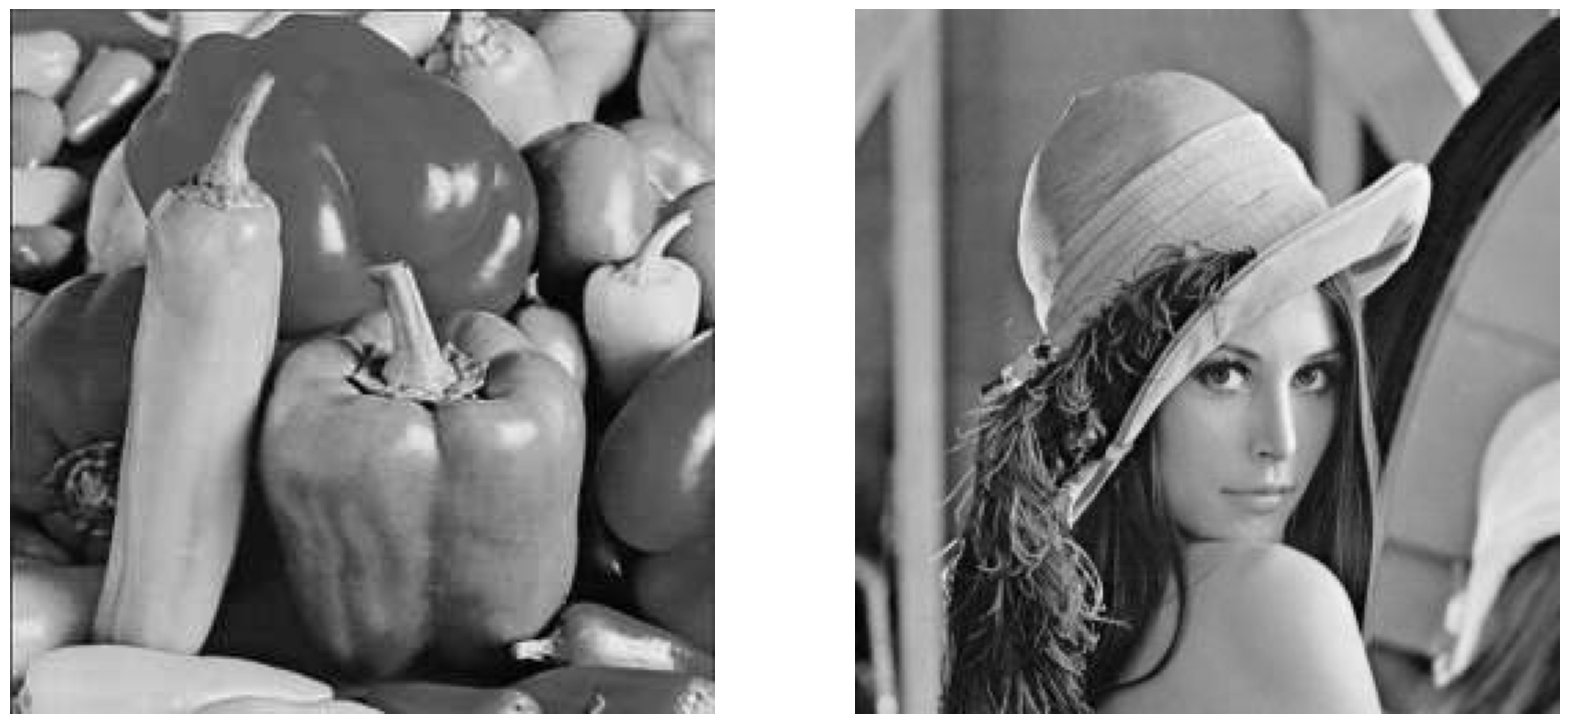

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imagelena = mpimg.imread(r"C:\Users\Dell\Downloads\LenaGray.jpg")
imagepepper = mpimg.imread(r"C:\Users\Dell\Downloads\PeppersGrey.jpg")
fig, axes = plt.subplots(1, 2, figsize=(20, 10))


axes[1].imshow(imagelena, cmap='gray')
axes[1].axis('off')
axes[0].imshow(imagepepper, cmap='gray')
axes[0].axis('off')
plt.show()

**B) Define a new 256 × 256 image J as follows: the upper half of J, i.e., the first 
128 rows, should be equal to the upper half of the Lena image. The lower half 
of J, i.e., the 129th row through the 256th row, should be equal to the lower
half of the Peppers image.**

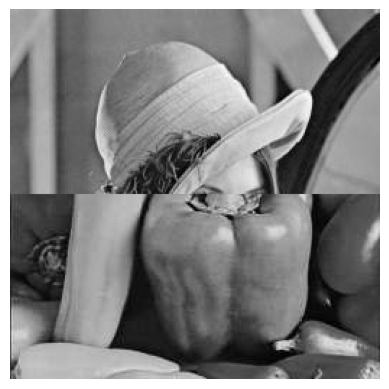

In [4]:
import numpy as np

J = np.full((256,256), 128, dtype=np.uint8)
J[:128, :] = imagelena[:128, :]
J[128:, :] =imagepepper[128:, :]

plt.imshow(J, cmap='gray')
plt.axis('off') 
plt.show()

 **C) Define a new 256 × 256 image K by swapping the upper and lower halves of J.**

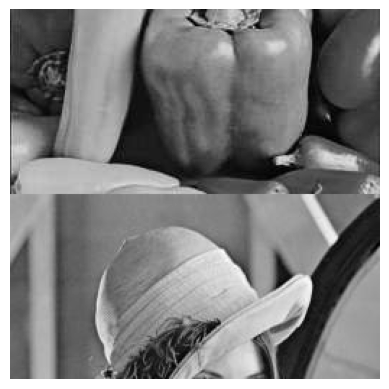

In [22]:
import numpy as np
K = np.copy(J)
K[:128,:]=J[128:,:]
K[128:,:]=J[:128,:]

plt.imshow(K , cmap='gray')
plt.axis('off')
plt.show()

**Assignment 2 :**

* The Images **LenaGrayNoisy.jpg** and **PeppersGreyNoisy.jpg** These are 256 × 256 gray scale images with 8 
bits per pixel. They have been corrupted by salt and pepper noise. 

**Write a program to implement (i) Image Negative and (ii) a gray scale Median Filter. 
In the cases of median filter, use a 3 × 3 square structuring element (window). To 
handle edge effects, set output pixels equal to gray level zero when the structuring 
element hangs over the borders of the image.**

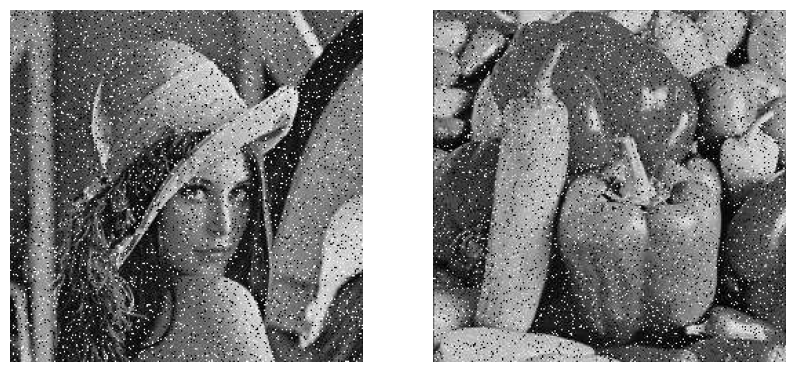

In [24]:
imagelenanoisy = mpimg.imread(r"C:\Users\Dell\Downloads\LenaGrayNoisy.jpg")
imagepeppernoisy = mpimg.imread(r"C:\Users\Dell\Downloads\PeppersGreyNoisy.jpg")
lena_neg=255-imagelenanoisy
peppers_neg=255-imagepeppernoisy

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(lena_neg , cmap='gray')
axes[0].axis('off')

axes[1].imshow(peppers_neg , cmap='gray')
axes[1].axis('off')
plt.show()



In [15]:
def median_filter_zero_padding(image):
    padded_image = np.pad(image, 1, mode='constant', constant_values=0)
    filtered_image = median_filter(padded_image, size=3)
    return filtered_image[1:-1, 1:-1]

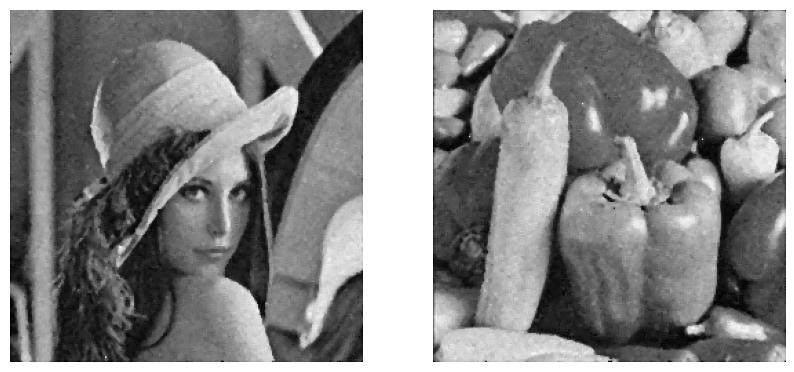

In [17]:
from scipy.ndimage import median_filter
filtered_lena = median_filter_zero_padding(imagelenanoisy)
filtered_peppers = median_filter_zero_padding(imagepeppernoisy)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(filtered_lena, cmap='gray')
axes[0].axis('off')
axes[1].imshow(filtered_peppers, cmap='gray')
axes[1].axis('off')
plt.show()